# Background fit 

For resonant background, we consider all possible Higgs production mechanisms: gluon-gluon129
fusion (ggH), vector-boson fusion (VBFH), associated production with a vector boson (VH), top130
quarks (ttH), and b-quarks (bbH) where Higgs decays into two photons.131

## ggJets

In [19]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/GGJets.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

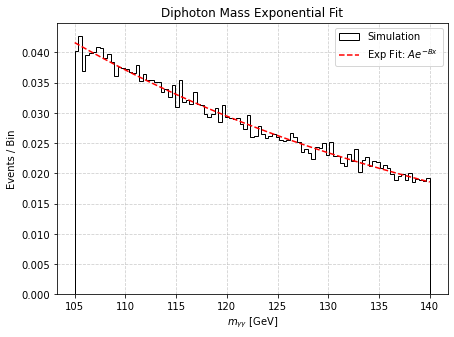

Fitted Parameters: A = 0.468, B = 0.02304


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GGJets.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GGJets.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")


### vector-boson fusion (VBFH)

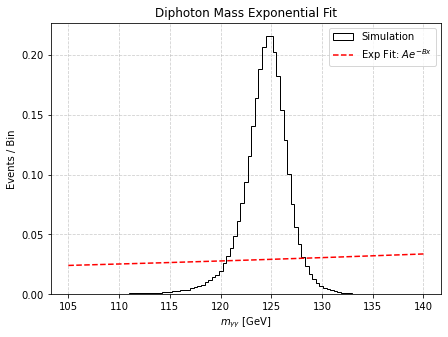

Fitted Parameters: A = 0.009, B = -0.00954


In [21]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/VBFHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



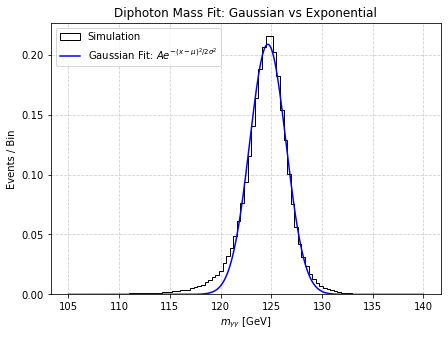

Gaussian Fit Parameters: A = 0.209, μ = 124.67 GeV, σ = 1.79 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00954


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")


# VHToGG

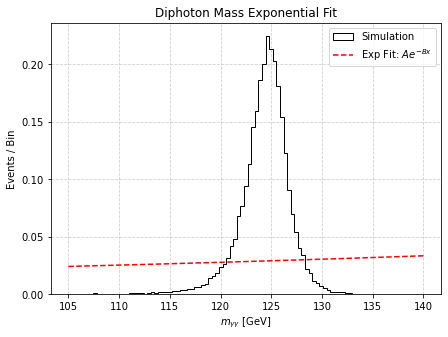

Fitted Parameters: A = 0.009, B = -0.00923


In [24]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/VHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



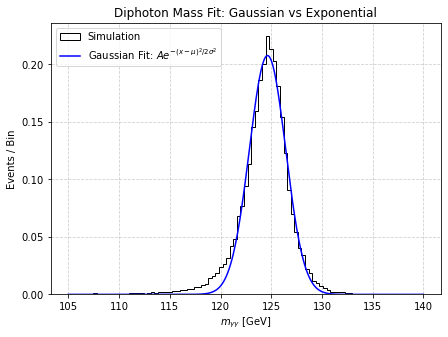

Gaussian Fit Parameters: A = 0.208, μ = 124.64 GeV, σ = 1.79 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00923


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")


## ttH

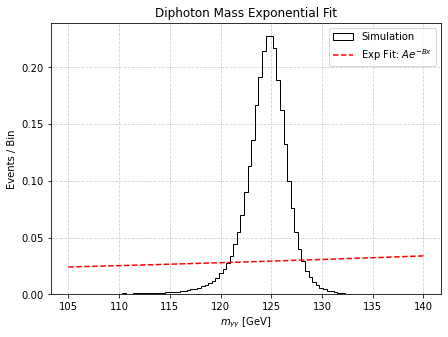

Fitted Parameters: A = 0.009, B = -0.00974


In [27]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/ttHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



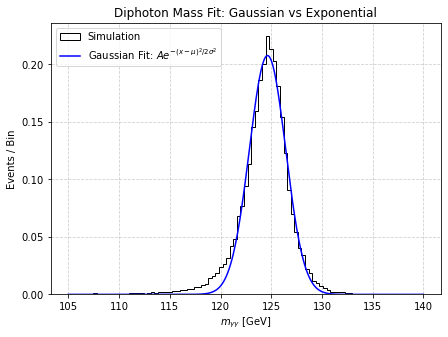

Gaussian Fit Parameters: A = 0.208, μ = 124.64 GeV, σ = 1.79 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00923


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")
